# **Лабораторная работа 5**
## **Вариант 1: Состав молока животных**

Этот набор данных содержит список животных и процентное содержание состав-
ных частей их молока.

Атрибуты:
* Name – название животного
* Water % – процентное содержание воды
* Protein % – процентное содержание белка
* Fat % – процентное содержание жира
* Lactose % – процентное содержание лактозы

**Цель лабораторной работы:**
научиться производить кластерный анализ данных с
использованием метода К-средних.

**Основные задачи:**
* изучение инструментария Python для реализации алгоритмов кластерного
анализа;
* изучение принципов определения оптимального количества кластеров в
методах кластерного анализа;
* освоение метода К-средних;
* изучение методов визуализации модели и оценки ее корректности.

## 1. Импортируем библиотеки и загружаем данные

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/drive/MyDrive/ОмГТУ/3 курс/5 семак/Машинное обучение/5 лр/milk.csv')
#смотрим первые 5 значений
df.head()

,Name,Water,Protein,Fat,Lactose
0,Deer,65.9,10.4,19.7,2.6
1,Donkey,90.3,1.7,1.4,6.2
2,Rat,72.5,9.2,12.6,3.3
3,Mule,90.0,2.0,1.8,5.5
4,Camel,87.7,3.5,3.4,4.8


## 2. Получим информацию о датасете

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     16 non-null     object 
 1   Water    16 non-null     float64
 2   Protein  16 non-null     float64
 3   Fat      16 non-null     float64
 4   Lactose  16 non-null     float64
dtypes: float64(4), object(1)
memory usage: 772.0+ bytes


## 3. Проверяем данные на наличие пропущенных значений и выбросов

In [4]:
print(df.isnull().sum())

Name       0
Water      0
Protein    0
Fat        0
Lactose    0
dtype: int64


## 4. Исключаем невлияющие категориальные признаки

In [5]:

df.drop('Name',axis=1, inplace=True)
df.head()

,Water,Protein,Fat,Lactose
0,65.9,10.4,19.7,2.6
1,90.3,1.7,1.4,6.2
2,72.5,9.2,12.6,3.3
3,90.0,2.0,1.8,5.5
4,87.7,3.5,3.4,4.8


## 5. Применяем операцию нормализации для численной устойчивости

In [6]:
#импортируем класс для стандартизации данных
from sklearn.preprocessing import StandardScaler

#создадим объект класса StandartScaler
scaler=StandardScaler()
scaler

StandardScaler()

## 6. Приведем данные к единому масштабу

In [7]:
X=scaler.fit_transform(df)
X[:5]

array([[-1.59032121,  1.16931189,  1.69308567, -1.02196575],
       [ 1.1556381 , -1.39801011, -1.05794365,  1.30472307],
       [-0.84756173,  0.81519851,  0.62574642, -0.56955403],
       [ 1.12187631, -1.30948177, -0.99781186,  0.85231135],
       [ 0.86303588, -0.86684004, -0.75728471,  0.39989964]])

## 7. Определяем оптимальное количество кластеров с помощью метода локтя

In [8]:
from sklearn.cluster import KMeans

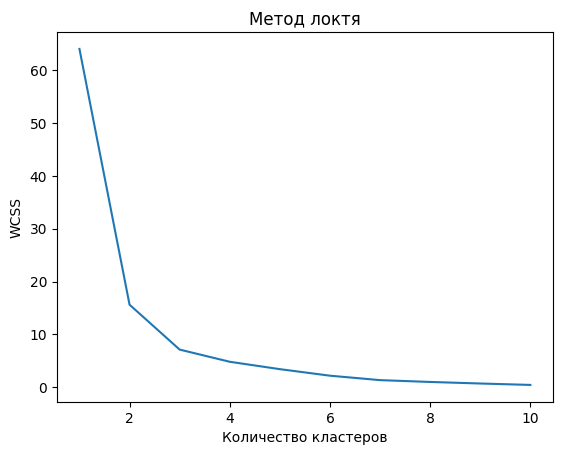

In [9]:
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

Как видно на графике, когда мы перешли от трех к четырем кластерам, ошибка перестала существенно уменьшаться. Создадим объект класса модели, используя три кластера в качестве гиперпараметра модели.

## 8. Обучаем модель кластеризации

In [10]:
#заново обучим модель с четырьмя кластерами
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)

#обучаем модель на стандартизированных данных
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=42)

## 9. Предсказываем кластеры и визуализируем результаты

In [11]:
# предсказываем кластеры для каждого
labels = kmeans.predict(X)

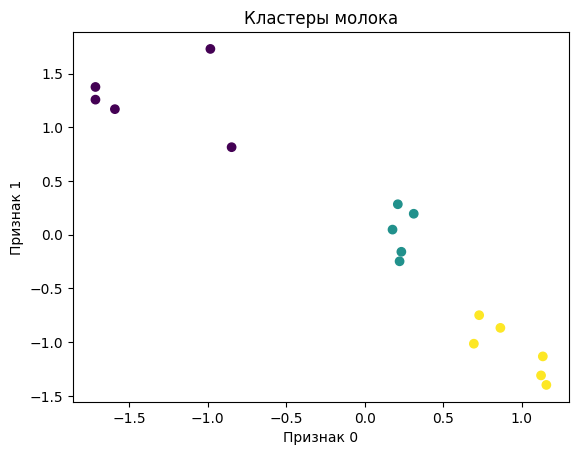

In [12]:
#визуализируем результаты
plt.scatter(X[:, 0],X[:,1], c=labels, cmap='viridis')
plt.title('Кластеры молока')
plt.xlabel('Признак 0')
plt.ylabel('Признак 1')
plt.show()

## 10. Интерпритируем результаты и улучшаем модель при необходимости

In [13]:
X[:5]

array([[-1.59032121,  1.16931189,  1.69308567, -1.02196575],
       [ 1.1556381 , -1.39801011, -1.05794365,  1.30472307],
       [-0.84756173,  0.81519851,  0.62574642, -0.56955403],
       [ 1.12187631, -1.30948177, -0.99781186,  0.85231135],
       [ 0.86303588, -0.86684004, -0.75728471,  0.39989964]])

In [14]:
labels

array([0, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 2], dtype=int32)

In [15]:
df['Label']=labels
df.head()

,Water,Protein,Fat,Lactose,Label
0,65.9,10.4,19.7,2.6,0
1,90.3,1.7,1.4,6.2,2
2,72.5,9.2,12.6,3.3,0
3,90.0,2.0,1.8,5.5,2
4,87.7,3.5,3.4,4.8,2


Мы можем легко проверить значения центроида, усреднив объекты в каждом кластере

In [16]:
df.groupby('Label').mean()

,Water,Protein,Fat,Lactose
Label,,,,
0,67.860000,10.740000,17.38,2.380000
1,82.080000,6.520000,6.50,4.140000
2,88.466667,2.783333,2.60,5.716667


В кластере 0 молоко имеет наибольший процент содержания белка и жира, содержание воды и лактозы наименьшее.
В кластере 2 молоко имеет наибольшие значения процента содержания воды и лактозы, содержание белка и жира наименьшее.

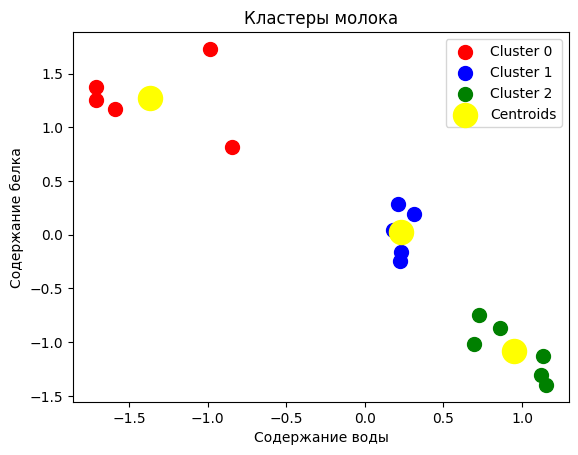

In [17]:
plt.scatter(X[labels==0,0], X[labels==0,1], s=100, c='red', label='Cluster 0')
plt.scatter(X[labels==1,0], X[labels==1,1], s=100, c='blue', label='Cluster 1')
plt.scatter(X[labels==2,0], X[labels==2,1], s=100, c='green', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=300, c='yellow', label='Centroids')
plt.title('Кластеры молока')
plt.xlabel('Содержание воды')
plt.ylabel('Содержание белка')
plt.legend()
plt.show()

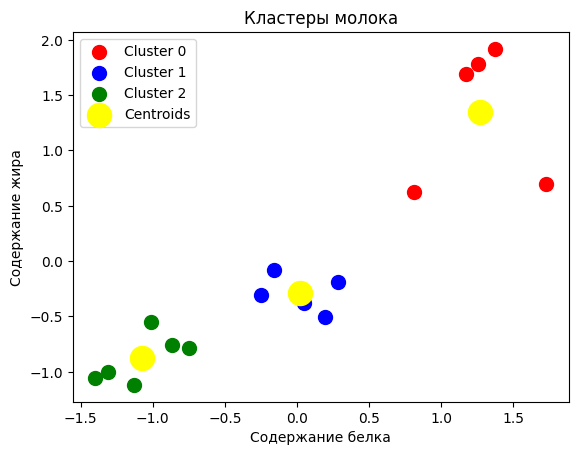

In [18]:
plt.scatter(X[labels==0,1], X[labels==0,2], s=100, c='red', label='Cluster 0')
plt.scatter(X[labels==1,1], X[labels==1,2], s=100, c='blue', label='Cluster 1')
plt.scatter(X[labels==2,1], X[labels==2,2], s=100, c='green', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2],
            s=300, c='yellow', label='Centroids')
plt.title('Кластеры молока')
plt.xlabel('Содержание белка')
plt.ylabel('Содержание жира')
plt.legend()
plt.show()